In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Load results

## synth results

In [47]:
filename = '2020-07-21_results_synt_dataset-0.csv'
path_to_data = '../recipes/echo_aware_processing/' + filename
results_synt = pd.read_csv(path_to_data)
results_synt

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-0.181171,3.843722,0.000590,-1.526472,3.839404,4.664875,1.188559,1.612592,1.835212
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,1.749639,3.843722,0.000590,-1.526472,16.074013,8.012684,7.383295,1.612592,2.093116
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,5.886880,3.843722,0.000590,-1.526472,13.995523,9.260658,7.978823,1.612592,2.106059
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,2.978417,3.843722,0.000590,-1.526472,12.454977,8.922375,7.314045,1.612592,2.073032
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,5.934370,3.843722,0.000590,-1.526472,36.850043,8.745936,8.740638,1.612592,2.229844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,670,4.0,0.0,3.0,2.0,20.0,20.0,dpDS,-5.199537,23.752631,19.982427,18.456152,27.854599,25.830599,23.708751,2.823435,3.144257
671,671,4.0,0.0,3.0,2.0,20.0,20.0,rtfMVDR,5.922062,23.752631,19.982427,18.456152,39.636524,29.479360,29.101017,2.823435,3.263339
672,672,4.0,0.0,3.0,2.0,20.0,20.0,ecoMVDR,5.940419,23.752631,19.982427,18.456152,38.301146,29.354189,28.869851,2.823435,3.265142
673,673,4.0,0.0,3.0,2.0,20.0,20.0,rtfLCMV,5.891670,23.752631,19.982427,18.456152,38.549050,28.734308,28.318846,2.823435,3.224714


## real results

In [48]:
filename = '2020-07-21_results_real_dataset-0.csv'
path_to_data = '../recipes/echo_aware_processing/' + filename
results_real = pd.read_csv(path_to_data)
results_real

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,8.447090,4.431923,0.020011,-1.309567,4.706376,0.717937,-0.730457,1.837392,1.857574
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,4.983015,4.431923,0.020011,-1.309567,4.393832,16.137509,4.112663,1.837392,2.201525
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,-6.867363,4.431923,0.020011,-1.309567,2.108559,21.316929,2.057010,1.837392,2.150610
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,3.854738,4.431923,0.020011,-1.309567,8.698202,11.041989,6.714061,1.837392,2.048770
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,-6.571615,4.431923,0.020011,-1.309567,1.522482,21.620697,1.481401,1.837392,2.033714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,670,4.0,0.0,3.0,2.0,20.0,20.0,dpDS,6.416155,23.619349,20.016401,18.439161,26.623468,19.378681,18.629101,2.820213,2.762128
671,671,4.0,0.0,3.0,2.0,20.0,20.0,rtfMVDR,5.534315,23.619349,20.016401,18.439161,23.985964,33.215742,23.496090,2.820213,3.201472
672,672,4.0,0.0,3.0,2.0,20.0,20.0,ecoMVDR,-6.615845,23.619349,20.016401,18.439161,21.795268,45.385117,21.775896,2.820213,3.108906
673,673,4.0,0.0,3.0,2.0,20.0,20.0,rtfLCMV,5.527489,23.619349,20.016401,18.439161,31.242113,31.178329,28.197229,2.820213,3.195902


In [49]:
results_real['data'] = 'real'
results_synt['data'] = 'synt'
results = pd.concat([results_synt, results_real], ignore_index=True)
results

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out,data
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-0.181171,3.843722,0.000590,-1.526472,3.839404,4.664875,1.188559,1.612592,1.835212,synt
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,1.749639,3.843722,0.000590,-1.526472,16.074013,8.012684,7.383295,1.612592,2.093116,synt
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,5.886880,3.843722,0.000590,-1.526472,13.995523,9.260658,7.978823,1.612592,2.106059,synt
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,2.978417,3.843722,0.000590,-1.526472,12.454977,8.922375,7.314045,1.612592,2.073032,synt
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,5.934370,3.843722,0.000590,-1.526472,36.850043,8.745936,8.740638,1.612592,2.229844,synt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,670,4.0,0.0,3.0,2.0,20.0,20.0,dpDS,6.416155,23.619349,20.016401,18.439161,26.623468,19.378681,18.629101,2.820213,2.762128,real
1346,671,4.0,0.0,3.0,2.0,20.0,20.0,rtfMVDR,5.534315,23.619349,20.016401,18.439161,23.985964,33.215742,23.496090,2.820213,3.201472,real
1347,672,4.0,0.0,3.0,2.0,20.0,20.0,ecoMVDR,-6.615845,23.619349,20.016401,18.439161,21.795268,45.385117,21.775896,2.820213,3.108906,real
1348,673,4.0,0.0,3.0,2.0,20.0,20.0,rtfLCMV,5.527489,23.619349,20.016401,18.439161,31.242113,31.178329,28.197229,2.820213,3.195902,real


# Investigation

## Global metrics vs bf

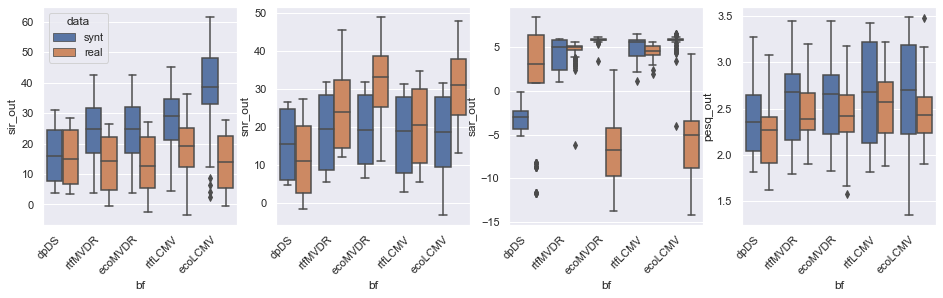

In [50]:
loc_res = results.copy()
# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
g = sns.boxplot(x='bf', y="sir_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(142)
g = sns.boxplot(x='bf', y="snr_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(143)
g = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(144)
g = sns.boxplot(x='bf', y="pesq_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()
plt.show()

## Incemental metrics vs bf

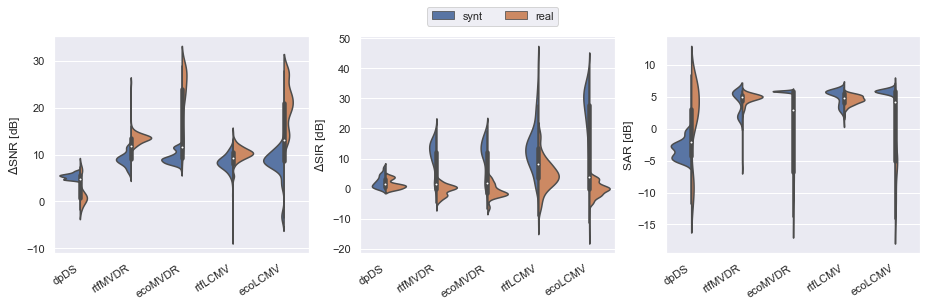

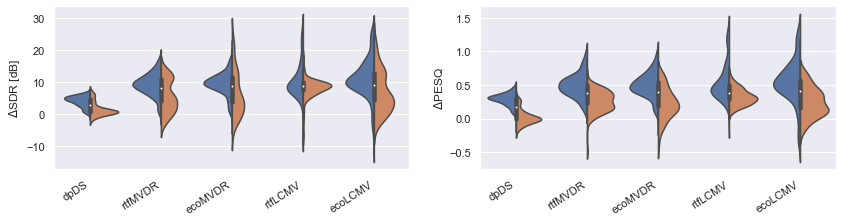

In [51]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']
# plot
plt.figure(figsize=(21,4))
plt.subplot(141)
g1 = sns.violinplot(x='bf', y="snr_inc", hue='data', data=loc_res, split=True)
g1.set_xticklabels(g1.get_xticklabels(), rotation=33, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta$SNR [dB]', xlabel='')

plt.subplot(142)
g2 = sns.violinplot(x='bf', y="sir_inc", hue='data', data=loc_res, split=True)
g2.set_xticklabels(g2.get_xticklabels(), rotation=33, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta$SIR [dB]', xlabel='')

plt.subplot(143)
g4 = sns.violinplot(x='bf', y="sar_out", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'SAR [dB]', xlabel='')

plt.savefig('../recipes/echo_aware_processing/bsseval_results_box.pdf', dpi=300)
plt.show()


plt.figure(figsize=(14,3))
plt.subplot(121)
g4 = sns.violinplot(x='bf', y="sdr_inc", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta$SDR [dB]', xlabel='')

plt.subplot(122)
g3 = sns.violinplot(x='bf', y="pesq_inc", hue='data', data=loc_res, split=True)
g3.set_xticklabels(g.get_xticklabels(), rotation=33, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta$PESQ', xlabel='')
plt.savefig('../recipes/echo_aware_processing/pesq_results_violin.pdf', dpi=300)
plt.show()

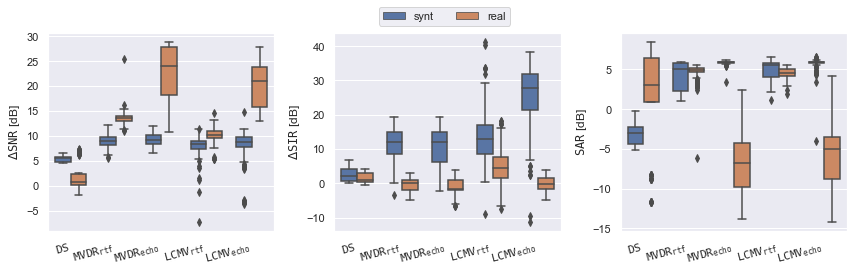

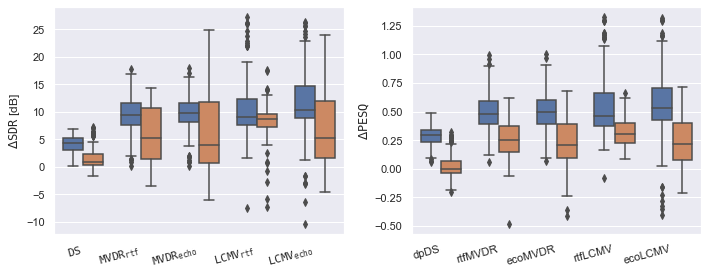

In [77]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']

# beautiful plot
width = 0.7
angle = 15
loc_res = loc_res.replace('dpDS', value='$\mathtt{DS}$')
loc_res = loc_res.replace('rtfMVDR', value='$\mathtt{MVDR}_{\mathtt{rtf}}$')
loc_res = loc_res.replace('rtfLCMV', value='$\mathtt{LCMV}_{\mathtt{rtf}}$')
loc_res = loc_res.replace('ecoMVDR', value='$\mathtt{MVDR}_{\mathtt{echo}}$')
loc_res = loc_res.replace('ecoLCMV', value='$\mathtt{LCMV}_{\mathtt{echo}}$')

# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
g1 = sns.boxplot(x='bf', y="snr_inc", hue='data', data=loc_res, width=width)
g1.set_xticklabels(g1.get_xticklabels(), rotation=angle, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta\mathtt{SNR}$ [dB]', xlabel='')

plt.subplot(142)
g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res, width=width)
g2.set_xticklabels(g2.get_xticklabels(), rotation=angle, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta\mathtt{SIR}$ [dB]', xlabel='')

plt.subplot(143)
g4 = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res, width=width)
g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\mathtt{SAR}$ [dB]', xlabel='')
plt.tight_layout()
plt.savefig('../recipes/echo_aware_processing/bsseval_results_boxplot.pdf', dpi=300)
plt.show()


plt.figure(figsize=(10,4))
plt.subplot(121)
g4 = sns.boxplot(x='bf', y="sdr_inc", hue='data', data=loc_res, width=width)
g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta\mathtt{SDR}$ [dB]', xlabel='')

plt.subplot(122)
g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res, width=width)
g3.set_xticklabels(g.get_xticklabels(), rotation=angle, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta\mathtt{PESQ}$', xlabel='')
plt.tight_layout()
plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
plt.show()

# Performance vs Dataset (~ RT60)

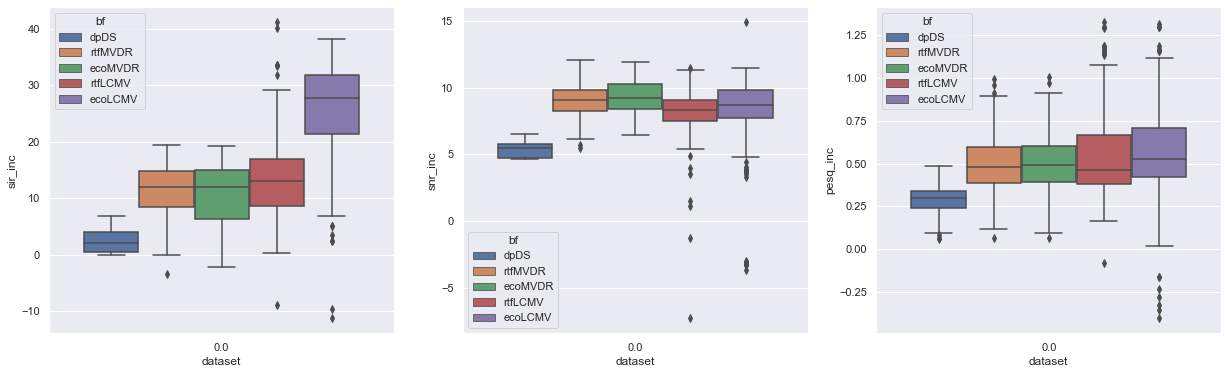

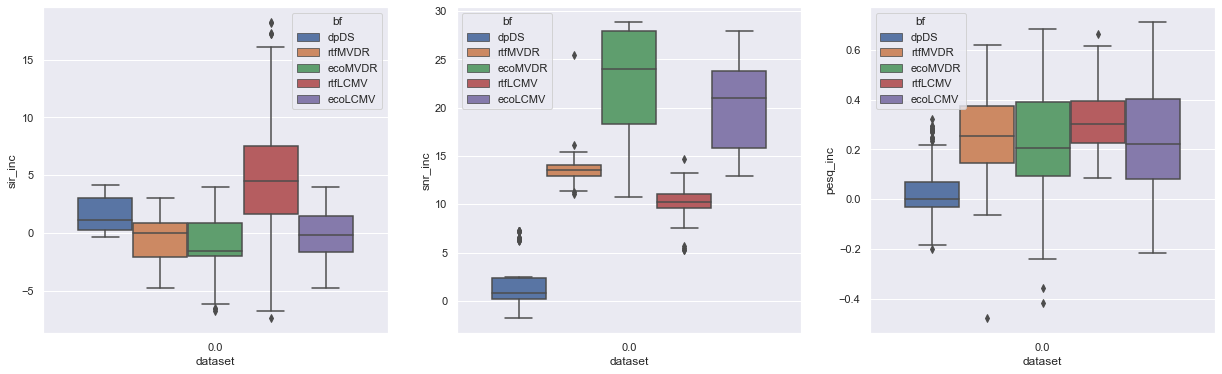

In [78]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


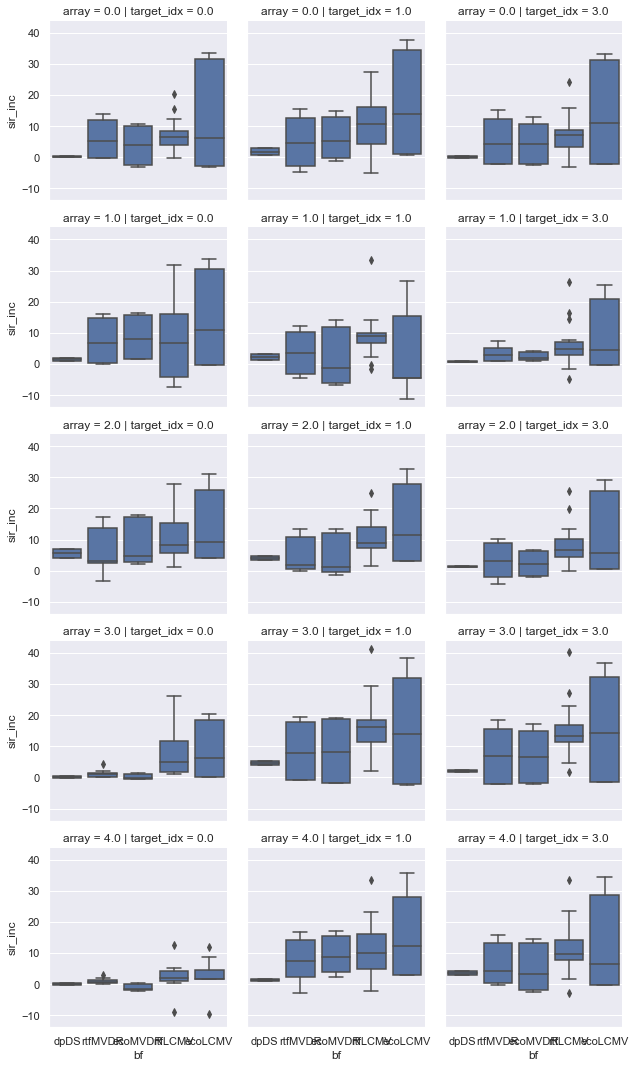

In [79]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


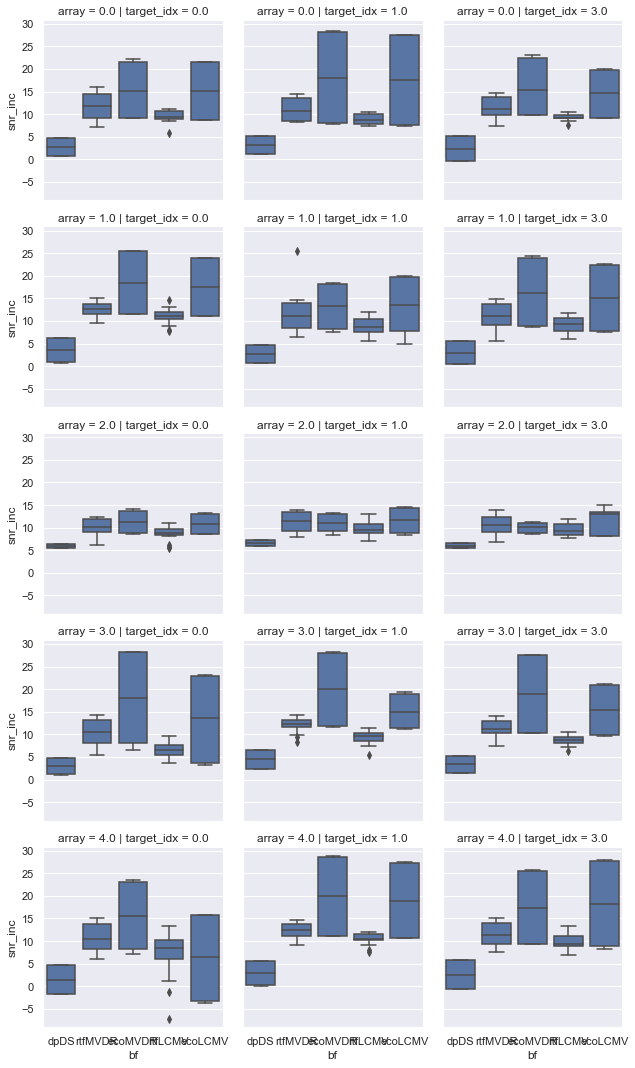

In [80]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

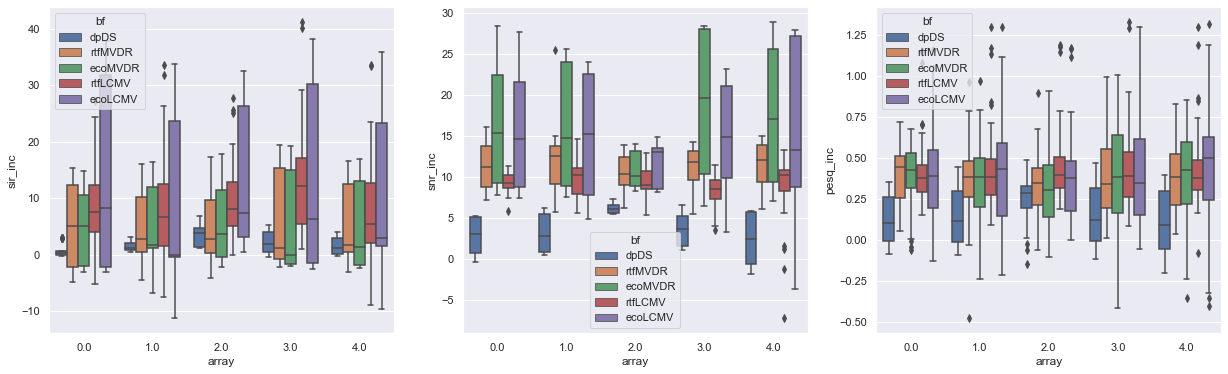

In [81]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
res